# Exploring American Deaths Abroad

Having the opportunity visit a number of different countries for work and leisure, I always make sure to research travel risks and stay aware of current news to keep myself safe. One of the resources I use is the U.S. State Dept website, featuring travel advisories and information of American non-natural caused deaths overseas since October 2002. In this project, I will explore this dataset to answers questions like:

    -What country outside of the U.S. has the most deaths since 2002? In this decade, 2010s?
    -What is the leading cause of overseas deaths?


[Notes from U.S. State Dept website](https://travel.state.gov/content/travel/en/international-travel/while-abroad/death-abroad1/death-statistics.html)
- "Sec. 204(c) of P.L. 107-228, the Foreign Relations Authorization Act for Fiscal Year 2003, mandates that, to the maximum extent practicable, the Department of State collect and make available on the Department's Bureau of Consular Affairs Internet web site certain information with respect to each United States citizen who dies in a foreign country from a non-natural cause. The information required is: (1) the date of death; (2) the locality where the death occurred; and (3) the cause of death, including, if the death resulted from an act of terrorism, a statement disclosing that fact. The information on the web site must be listed on a country-by-country basis, and must cover deaths occurring since the date of enactment of the legislation on September 30, 2002, or occurring during the preceding three calendar years, whichever period is shorter. The information is updated every six months."

- "Deaths that are listed as 'undetermined/unknown' have been reported to the Department of State as deaths from non-natural causes, but local authorities have not provided additional information."


In [387]:
import pandas as pd
import numpy as np
import datetime
deaths= pd.read_csv("deaths_abroad_semiclean.csv")
print(deaths.head())
print(deaths.describe())
print(deaths.tail())

         Date                  City      Country    Cause of Death
0  10/25/2003  Shkin -  Afghanistan  Afghanistan  Terrorist Action
1  10/25/2003  Shkin -  Afghanistan  Afghanistan  Terrorist Action
2   8/29/2004  Kabul -  Afghanistan  Afghanistan  Terrorist Action
3   8/29/2004  Kabul -  Afghanistan  Afghanistan  Terrorist Action
4   8/29/2004  Kabul -  Afghanistan  Afghanistan  Terrorist Action
             Date                                  City Country Cause of Death
count       13728                                 13724   13728          13728
unique       5264                                  7728     186            117
top     1/12/2010  Tijuana -  Baja California -  Mexico  Mexico       Homicide
freq          120                                   124    3863           2557
             Date                                  City   Country  \
13723   7/19/2008     Marlborough -  Harare -  Zimbabwe  Zimbabwe   
13724    8/9/2009  Mount Pleasant -  Harare -  Zimbabwe  Zimbabwe

Looking at the dataset, there are about 13,728 entries, since October 2002. There are only 3 columns, date, city, and cause of death. Here are some initials thoughts about each column:
- The _date_ column includes month, date, and year. I will seperate these into columns in order to aggregate data later on by month and year. 
- The _city_ column gives more information than a city. Some entries includes a state/prefecture and the country. At the very least, I want to seperate the country into a different column in order to aggregate data by country. This column may need much cleaning since some countries are not listed at all.
- The _cause of death_ column can include subcategories and different format for the same type of death such as 'Veh. Accid' and 'Vehicle Accident.' 

In [388]:
deaths['Year'] = pd.DatetimeIndex(deaths['Date']).year
deaths['Month'] = pd.DatetimeIndex(deaths['Date']).month
deaths.head()

,Date,City,Country,Cause of Death,Year,Month
0,10/25/2003,Shkin - Afghanistan,Afghanistan,Terrorist Action,2003,10
1,10/25/2003,Shkin - Afghanistan,Afghanistan,Terrorist Action,2003,10
2,8/29/2004,Kabul - Afghanistan,Afghanistan,Terrorist Action,2004,8
3,8/29/2004,Kabul - Afghanistan,Afghanistan,Terrorist Action,2004,8
4,8/29/2004,Kabul - Afghanistan,Afghanistan,Terrorist Action,2004,8


In [389]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [390]:
import re
#deaths['Country']=deaths['City'].str.extract(r'(\w+)$')
print_full(deaths['Country'].value_counts())


Mexico                                      3863
Thailand                                     466
Costa Rica                                   454
Dominican Republic                           342
Philippines                                  333
Germany                                      323
Haiti                                        302
Iraq                                         256
Honduras                                     252
Jamaica                                      251
Canada                                       240
China                                        238
Bahamas                                      212
India                                        197
Australia                                    194
Korea, Republic of (South Korea)             188
Italy                                        167
Colombia                                     164
Japan                                        162
Guatemala                                    158
Vietnam             

Because the data imported from the state dept only contains records of death events, some countries may have 0 deaths abroad. I'll import a list of countries to compare later with the recorded events. 

In [391]:
from csv import reader
opened_file=open("country_list.csv")
reader_file= reader(opened_file)
countries=list(reader_file)

countries_clean=[]
for country in countries:
    for c in country:
        countries_clean.append(c)
        
print_full(countries_clean)
print(len(countries_clean))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burma', 'Capo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, Democratic Republic of (Kinshasa)', 'Congo, Republic of (Brazzaville)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'The Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', '

In [392]:
print_full(deaths['Cause of Death'].value_counts())

Homicide                              2557
Suicide                               1973
Drowning                              1752
Other Accident                        1708
Veh. Accid-Auto                       1659
Veh. Accident-Auto                     887
Veh. Accid-Motorcy.                    455
Air Accident                           400
Terrorist Action                       390
Drug-Related                           341
Veh. Accid-Pedestr.                    186
Disaster                               166
Vehicle Accident - Auto                152
Veh. Accident-Motorcycle               146
Maritime Accident                      139
Veh. Accid-Other                       120
Veh. Accid-Bus                         115
Veh. Accident-Pedestrian                65
Undetermined/Unknown                    54
Natural Disaster                        45
Veh. Accident-Bus                       34
Vehicle Accident - Motorcycle           32
Unknown/Undetermined                    25
Veh. Accid-

# Cleaning cause of death
Looking at the _cause of death_ column, there are many formats for the same type of cause, creating unique values. I will generalize most of the causes, mainly the drownings and vehicles accidents

In [393]:
deaths['Cause of Death']=deaths['Cause of Death'].str.lower()

#find all types of vehicles accidents and change to just 'Vehicle Accident'
deaths.loc[deaths['Cause of Death'].str.contains('veh'),'Cause of Death']='vehicle accident'
#find all types of drowings and change to just 'Drowning'
deaths.loc[deaths['Cause of Death'].str.contains('drown'),'Cause of Death']='drowning'

deaths.loc[deaths['Cause of Death'].str.contains('other'),'Cause of Death']='other accident'
deaths.loc[deaths['Cause of Death'].str.contains('unknown'),'Cause of Death']='unknown/undetermined'
deaths.loc[deaths['Cause of Death'].str.contains('investigation'),'Cause of Death']='unknown/undetermined'
deaths.loc[deaths['Cause of Death'].str.contains('homocide'),'Cause of Death']='homicide'
deaths.loc[deaths['Cause of Death'].str.contains('hostage'),'Cause of Death']='hostage-related'

print_full(deaths['Cause of Death'].value_counts())


vehicle accident        4013
homicide                2561
suicide                 1973
drowning                1838
other accident          1731
air accident             400
terrorist action         390
drug-related             343
disaster                 166
maritime accident        139
unknown/undetermined      89
natural disaster          45
execution                 18
train accident            14
armed conflict             6
hostage-related            2
Name: Cause of Death, dtype: int64


# Exploring the Data
Now that the data is clean enough, I will try to answer my original questions.

The leading cause of death of Americans abroad are vehicle accidents followed by homicides, suicides, and drownings. 

In [394]:
#This line is used to export the clean data
#deaths.to_csv(r'deaths_abroad_clean.csv')

In [395]:
grouped_country=deaths.groupby('Country')
grouped_cause=deaths.groupby('Cause of Death')

japan=grouped_country.get_group('Japan')
#japan['Cause of Death'].value_counts()
va=grouped_cause.get_group('vehicle accident')
print('Countries with mosts deaths overseas')
print(deaths['Country'].value_counts().head(10))
print('Countries with most vehicle accident deaths overseas')
va['Country'].value_counts().head(10)

Countries with mosts deaths overseas
Mexico                3863
Thailand               466
Costa Rica             454
Dominican Republic     342
Philippines            333
Germany                323
Haiti                  302
Iraq                   256
Honduras               252
Jamaica                251
Name: Country, dtype: int64
Countries with most vehicle accident deaths overseas


Mexico                1378
Thailand               171
Dominican Republic     114
Philippines             90
India                   89
Costa Rica              88
China                   82
Germany                 74
Vietnam                 74
Canada                  73
Name: Country, dtype: int64

Looking into vehicles accidents even further, the top five countries for vehicles accident deaths since 2002 were Mexico, Thailand, Dominican Republic, Philippines and India. These nearly match the top countries for overall deaths

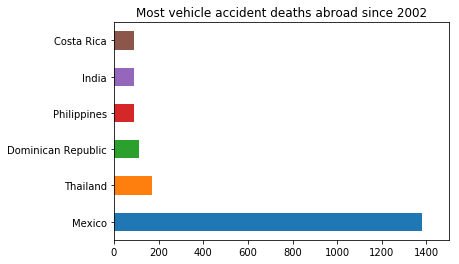

In [396]:
va['Country'].value_counts().head(6).plot(kind='barh',xlim=(0,1500),title='Most vehicle accident deaths abroad since 2002',legend=False)


In [397]:
hom=grouped_cause.get_group('homicide')
print('Countries with most homicides overseas')
print(hom['Country'].value_counts().head(10))

Countries with most homicides overseas
Mexico                1129
Philippines            144
Haiti                  117
Honduras               106
Dominican Republic     105
Colombia                79
Jamaica                 73
Guatemala               64
El Salvador             62
Costa Rica              54
Name: Country, dtype: int64


In [398]:
sui=grouped_cause.get_group('suicide')
print('Countries with most suicides overseas')
print(sui['Country'].value_counts().head(10))

Countries with most suicides overseas
Mexico                              348
Germany                             125
Thailand                            118
Korea, Republic of (South Korea)    100
Japan                                87
Costa Rica                           65
France                               55
Australia                            55
Philippines                          52
China                                49
Name: Country, dtype: int64


In [399]:
drown=grouped_cause.get_group('drowning')
print('Countries with most drownings overseas')
print(drown['Country'].value_counts().head(10))

Countries with most drownings overseas
Mexico                470
Costa Rica            141
Bahamas               112
Jamaica                67
Dominican Republic     60
Belize                 46
Greece                 46
Thailand               38
Australia              34
Honduras               34
Name: Country, dtype: int64


In [400]:
deaths_2010s=deaths[deaths['Year']>=2010]
print('Countries with most deaths since 2010')
deaths_2010s['Country'].value_counts().head(5)

Countries with most deaths since 2010


Mexico         2266
Thailand        275
Costa Rica      261
Haiti           246
Philippines     232
Name: Country, dtype: int64

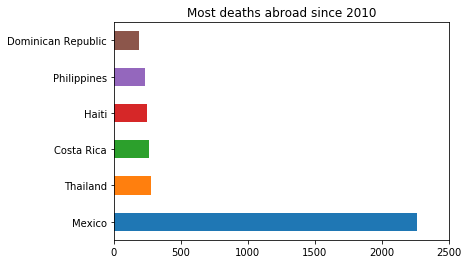

In [460]:
grouped_country_since2010=deaths.groupby('Country')
grouped_cause_since2010=deaths_2010s.groupby('Cause of Death')

deaths_2010s['Country'].value_counts().head(6).plot(kind='barh',xlim=(0,2500),title='Most deaths abroad since 2010',legend=False)

#cr=grouped_country_since2015.get_group('Costa Rica')
#print(cr['Year'].value_counts())

#th=grouped_country_since2015.get_group('Thailand')
#print(th['Year'].value_counts())

#ph=grouped_country_since2015.get_group('Philippines')
#print(ph['Year'].value_counts())

#th=grouped_cause_since2015.get_group('drowning')
#print(th['Year'].value_counts())

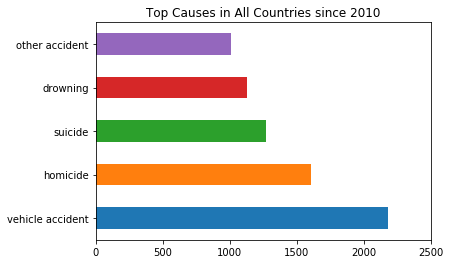

In [461]:
#grouped_month=deaths_2010s.groupby('Month')

#month=grouped_month.get_group(7)
#month['Year'].value_counts()
deaths_2010s['Cause of Death'].value_counts().head(5).plot(kind='barh',xlim=(0,2500),title='Top Causes in All Countries since 2010',legend=False)
